In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)#visa_dataset
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [7]:
wage_data=visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [8]:
#mean value
wage_data.mean()

74455.81459209221

In [9]:
#median value
wage_data.median()

70308.20999999999

- mean > median value

- slightly greater than

- Right skewed or postive skewed

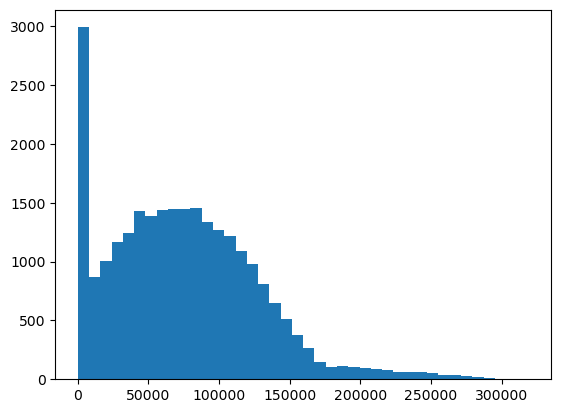

In [10]:
plt.hist(wage_data,bins=40)
plt.show()

**Boxplot**

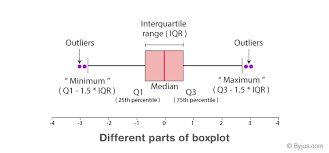

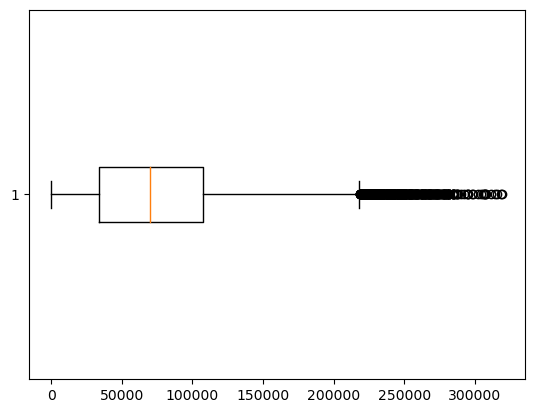

In [12]:
plt.boxplot(wage_data,vert=False)
plt.show()

**Find the outliers**

- Q1=25percentile
- Q2=50percentile
- Q3=75percntile
- IQR=Q3-Q1
- UPPER BOUND(UB)=Q3+1.5IQR
- LOWER BOUND(LB)=Q1-1.5*IQR
- cond1=wage_data>UB
- cond2=wage_data<LB
- wage_data[cond1|cond2]

In [20]:
def outliers_data():
    q1=np.percentile(wage_data,25)
    q3=np.percentile(wage_data,75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    cond1=wage_data>ub
    cond2=wage_data<lb
    outliers=wage_data[cond1|cond2]
    return outliers
outliers=outliers_data()
outliers,len(outliers)

(14       220081.73
 34       225569.73
 130      247393.01
 216      269321.68
 221      219529.62
            ...    
 25191    280482.51
 25195    234308.77
 25468    272715.74
 25469    273772.47
 25476    279174.79
 Name: prevailing_wage, Length: 427, dtype: float64,
 427)

In [21]:
len(outliers)/len(wage_data)*100#1.67 percentile outliers 

1.6758241758241759

$How$ $to$ $treat$ $outliers$:

- Removal of outlier , if outlier percentage < 2%

- Impute with Median 

- Cap with >Q3 with Q3 values and <Q1 values with Q1 value

- Apply Z-standardization find those outliers count and values is same

- then those are called influential outliers

- apply the first 3 methods 

**Step-1**
- Removal of outliers

In [31]:
def non_outliers_data():
    q1 = np.percentile(wage_data,25)
    q2 = np.percentile(wage_data,50)
    q3 = np.percentile(wage_data,75)
    iqr= q3-q1

    ub= q3+1.5*iqr
    lb= q1-1.5*iqr
    con1=wage_data<ub 
    con2=wage_data>lb 
    non_outliers=visa_df[con1&con2]  # dataframe remove the values
    return non_outliers

non_outliers=non_outliers_data()
len(non_outliers)


25053

In [32]:
non_outliers

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


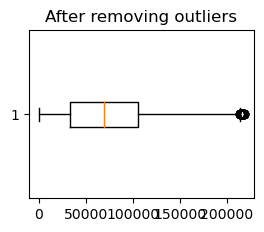

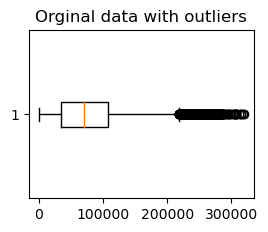

In [38]:
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)#visa_dataset
visa_df
##########################################
plt.subplot(2,2,1)
plt.title('After removing outliers')
plt.boxplot(non_outliers['prevailing_wage'],vert=False)
plt.show()
#################################################
plt.subplot(2,2,2)
plt.title('Orginal data with outliers')
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<AxesSubplot:>

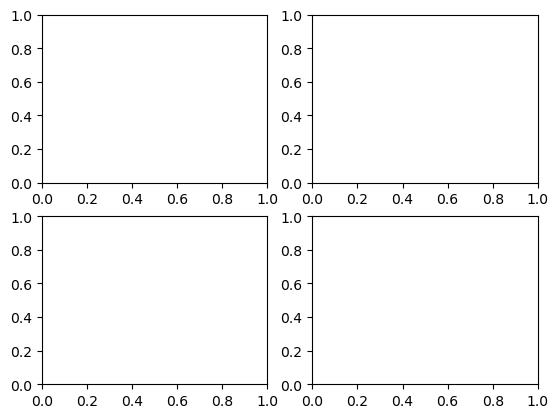

In [39]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

$step-2:$ 

**Impute with median values**

- where ever outliers are there impute with median value

- where ever outliers are not there keep the same value

In [41]:
outliers[:10]

14     220081.73
34     225569.73
130    247393.01
216    269321.68
221    219529.62
325    232227.33
328    238691.32
348    220448.17
427    230750.48
457    235339.91
Name: prevailing_wage, dtype: float64

In [43]:
wage_data.median()

70308.20999999999

**np.where**

In [52]:
dict1={'Col1':[1,2,3],'Col2':['A','B','C']}
data=pd.DataFrame(dict1)
data
# i want to replace with 100 col1 values which are having>2
# 1 2 100

,Col1,Col2
0,1,A
1,2,B
2,3,C


In [45]:
data['Col1']>2

0    False
1    False
2     True
Name: Col1, dtype: bool

- for binary conditions 

- If any condition is true will modify

- otherwise dont modify

- np.where(condition,modify_value,same_value) 

- np.where(condition,True,False)

In [53]:
data['Col1']=np.where(data['Col1']>2,100,data['Col1'])
# 1   2     3
# 1>2  False ===== > 1
# 2>2  False =====> 2
# 3>2  True ===== > 100
data

,Col1,Col2
0,1,A
1,2,B
2,100,C


In [54]:
dict1={'Col1':[1,2,3],'Col2':['A','B','C']}
data=pd.DataFrame(dict1)
data

# where ever col1> 2  ===== replace with 100
# otherwise replace with same values
# [1,2,100]

data['Col1']=np.where(data['Col1']>2,  # 3>2 T
                      100,
                      data['Col1'])   
data

,Col1,Col2
0,1,A
1,2,B
2,100,C


In [58]:
# read the data
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)

q1=np.percentile(wage_data,25)
q3=np.percentile(wage_data,75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
con1=visa_df['prevailing_wage']>ub
con2=visa_df['prevailing_wage']<lb
con1|con2
median=visa_df['prevailing_wage'].median()
#np.where(<condition>,<modified_vale>,<same>)

visa_df['prevailing_wage']=np.where(con1|con2,
                                    median,
                                    visa_df['prevailing_wage'])

visa_df['imputed_column']=np.where(con1|con2,
                                    median,
                                    visa_df['prevailing_wage'])

In [59]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,imputed_column
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


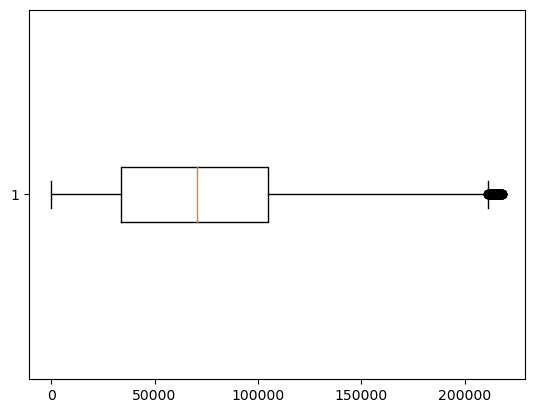

In [62]:
plt.boxplot(visa_df['imputed_column'],vert=False)
plt.show()

In [63]:
import os 
os.getcwd()

'C:\\Users\\lenovo'